In [3]:
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import os 
import numpy as np
from sklearn.cluster import DBSCAN
from DBSCAN_utils import *

In [4]:
RR=data_importation()

## approche par PDynamique // test matrice d'adjacence

44.75999999999992 28.067681999999994


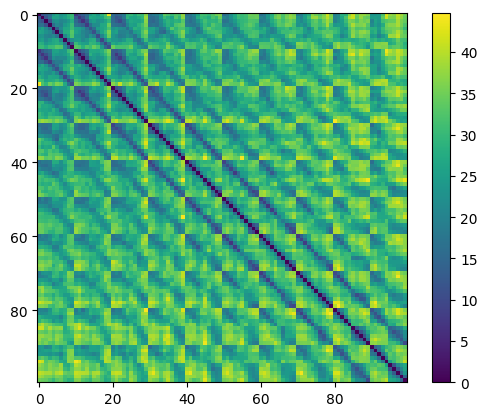

In [21]:
distance_matrix = calculate_distance_matrix(RR, 0, 10, 0, 10, dtw_distance)
print(distance_matrix.max(),distance_matrix.mean())
plt.imshow(distance_matrix)
plt.colorbar()

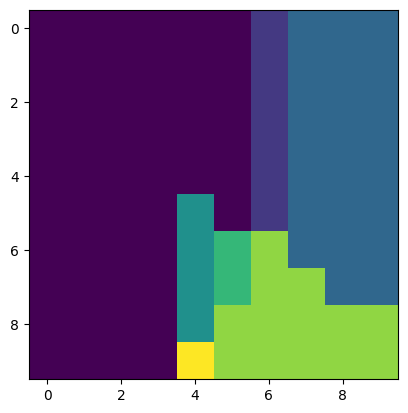

In [22]:
dbscan_dynamic = DBSCAN(eps=15, min_samples=1, metric='precomputed')
dbscan_dynamic.fit(distance_matrix)
labels=dbscan_dynamic.labels_
plt.imshow(labels.reshape(10,10))

## approche classic par DBSCAN SKLEARN

## Sliding window

In [5]:
longitude_max = 2
latitude_max = 2
step = 9
width = 10

la case en dessous prends 4 min de calcule a voir si necessaire tout les resultats sont obtenables apres

In [6]:
dict_clusters,dict_labels,core_points=DBSCAN_Slinding_Window(RR,longitude_max = 2,latitude_max = 2,step = 9,width = 10,eps=10,min_samples=1,metric=dtw_distance)

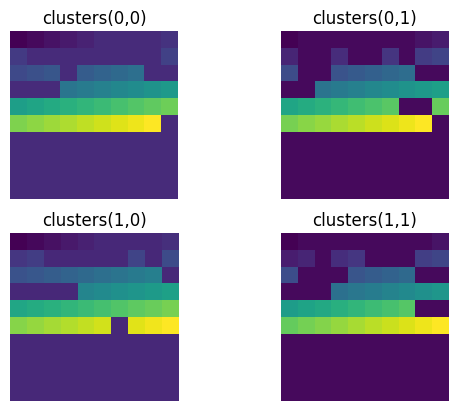

In [7]:
affichage_clusters(dict_labels,longitude_max,latitude_max)

# sauvegarde de matrice 50*50 km et exemple d'appel d'info

In [6]:
longitude_max = 5
latitude_max = 5
step = 9
width = 10

a ne pas faire tourner la case juste en dessous prends 33min (données sauvegardées deja)

In [ ]:
d = {}
for i in range(5):
    for j in range(5):
        d[f"distance_matrix{i},{j}"] = calculate_distance_matrix(
            RR, i * step, width + i * step, j * step, width + j * step, dtw_distance
        )

# Save the dictionary to a file
import pickle
with open(f'distance_matrices_width={width}_step={step}.pkl', 'wb') as f:
    pickle.dump(d, f)


In [7]:

# Load the dictionary from the file
with open(f'distance_matrices_width={width}_step={step}.pkl', 'rb') as f:
    d_loaded = pickle.load(f)

# Example: Access the distance matrix for the (2,3) position
key = "distance_matrix2,3"
if key in d_loaded:
    matrix = d_loaded[key]
    print(key)
    print(matrix)
else:
    print(f"No distance matrix found for key {key}")


distance_matrix2,3
[[  0.    23.25  35.85 ... 103.97  78.19  61.16]
 [ 23.25   0.    26.54 ...  85.65  66.7   54.11]
 [ 35.85  26.54   0.   ...  86.95  64.64  45.22]
 ...
 [103.97  85.65  86.95 ...   0.    39.22  77.69]
 [ 78.19  66.7   64.64 ...  39.22   0.    47.43]
 [ 61.16  54.11  45.22 ...  77.69  47.43   0.  ]]


# TEST a faire utilisé directement pour voir les parametres

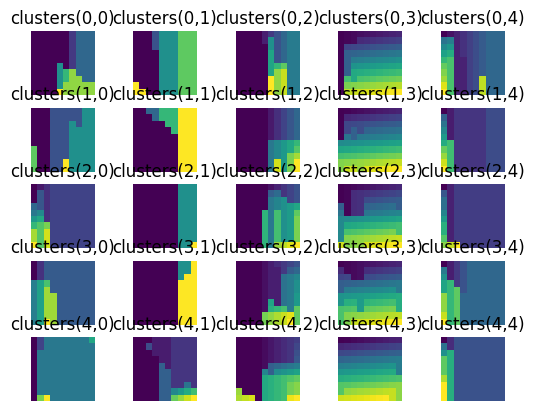

In [8]:
dict_clusters,dict_labels,core_points=DBSCAN_DP(longitude_max = longitude_max,latitude_max = latitude_max,step=step,width=width,eps=15,min_samples=1)
affichage_clusters(dict_labels,longitude_max,latitude_max)

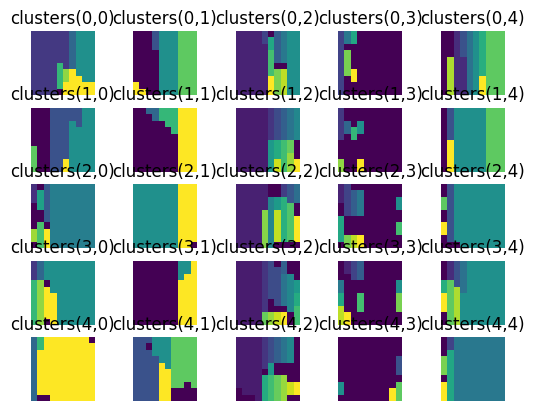

In [7]:
dict_clusters,dict_labels,core_points=DBSCAN_DP(longitude_max = longitude_max,latitude_max = latitude_max,step=step,width=width,eps=15,min_samples=2)
affichage_clusters(dict_labels,longitude_max,latitude_max)

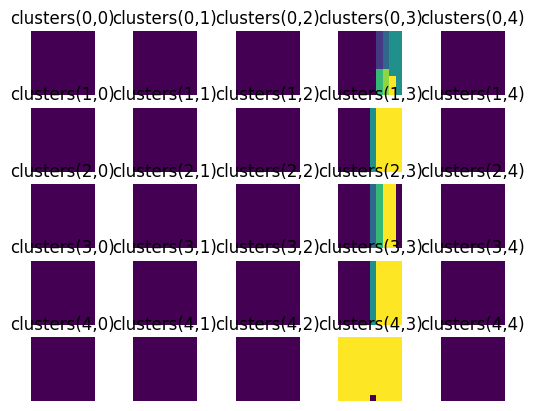

In [9]:
dict_clusters,dict_labels,core_points=DBSCAN_DP(longitude_max = longitude_max,latitude_max = latitude_max,step=step,width=width,eps=40,min_samples=2)
affichage_clusters(dict_labels,longitude_max,latitude_max)

# organisation clusters et jointure entre les elements

In [9]:
for i in range(longitude_max):
    for j in range(latitude_max):
        if i+1<longitude_max:
            merge_clusters_if_shared_core_point(i, j, i+1, j, core_points, dict_labels, step, width,1,set())
        if j+1<latitude_max:
            merge_clusters_if_shared_core_point(i, j, i, j+1, core_points, dict_labels, step, width,1,set())
        

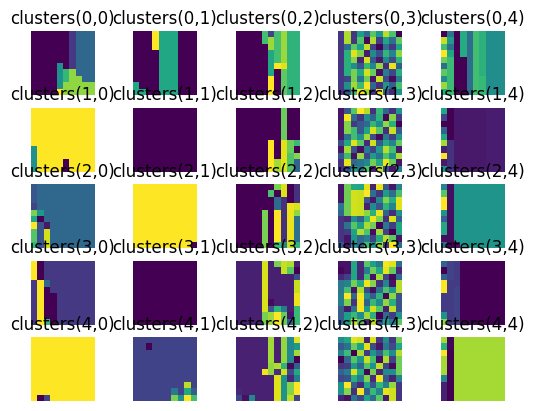

In [12]:
affichage_clusters(dict_labels,longitude_max,latitude_max)
